# Principal Component Analysis

Motivation of Dimension Reduction:
- Imagine a dataset with 30+ features, how would you understand the key features?
- Visualization and Data Analysis have limitations when the number of feature dimensions increases.

---
Dimensionality Reduction Outcomes:
- Understand which features describe the most variance in the data set.
- Can also act as a simpler data set for training data for machine learning algorithms. Reduce dimensions then train ML Algorithm on smaller data set.
- Aid human understanding of large feature sets, especially through visualization.
---
Important Note:
- Dimensionality Reduction algorithms such as PCA do not simply choose a subset of the existing features. 
- They create new dimensional components that are combinations of proportions of the existing features.
---
Variance Explained
- Measure the proportion to which each feature accounts for dispersion in the data set.
- Principal Component Analysis operates by creating a new set of dimensions (the principal components) that are normalized linear combinations of the original features. The more variance the original feature accounts for, the more influence it has over the principal components.
- Here we went from 2 features down to 1 principal component.
- This single principal component can “explain” some percentage of the original data, for example 90% of variance explained by principal component.
- 100% of the variance in the data is explained by all the original features.
- We trade off some of the explained variance for less dimensions.
- This can be significant savings for data sets with many dimensions, but only a few strong features.
- **The Principal Components (PCs) represents the directions of the maximum variance in the data.**
---
PCA Steps
- Get original data -- Standardize it
- Calculate Covariance Matrix
- Calculate EigenValues and EigenVectors of Cov matrix
- Sort EigenVectors by EigenValues
- Choose N largest EigenValues
- Project original data onto EigenVectors

    <img src='images/PCA1.png' width='500'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [4]:
df = pd.read_csv('data/cancer_tumor_data_features.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA - Manual Implementation

### 1) Get original data -- Standardize it

In [12]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(df)

X_scaled.mean(axis=0)
# a (almost) zero vector

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
       -8.36667193e-16,  1.87313551e-16,  4.99502802e-17, -4.99502802e-17,
        1.74825981e-16,  4.74527662e-16,  2.37263831e-16, -1.12388130e-16,
       -1.12388130e-16, -1.31119486e-16, -1.52972733e-16,  1.74825981e-16,
        1.62338411e-16,  0.00000000e+00,  8.74129903e-17, -6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.62238971e-16, -5.74428222e-16])

### 2) Calculate Covariance Matrix

In [14]:
covariance_matrix = np.cov(X_scaled, rowvar=False)
# rowvar=False --> covarince b/w features but not b/w data pts

covariance_matrix.shape
# n x n

(30, 30)

### 3) Calculate EigenValues and EigenVectors of Cov matrix 

In [59]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

### 4) Sort EigenVectors by EigenValues

Text(0, 0.5, '$\\lambda / \\lambda_{max}$')

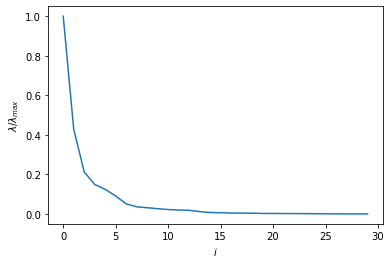

In [60]:
sorted_eval_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_eval_idx]
eigenvectors = eigenvectors[sorted_eval_idx]

plt.plot(range(len(eigenvalues)), eigenvalues/eigenvalues[0])
plt.xlabel('$i$')
plt.ylabel('$\lambda / \lambda_{max}$')

### NOTE

So far we went from $N$ feature space to $N$ component (PC) space.

Now, we choose $N=2$ i.e. top 2 components based on eigenvalues for visualization purpose. But given the above plot, a good choice would be $N=5$.

### 5) Choose N largest EigenValues

In [61]:
num_PCs = 2
eigenvalues = eigenvalues[:num_PCs]
eigenvectors = eigenvectors[:,:num_PCs]

In [62]:
eigenvectors.shape

(30, 2)

### 6) Project original data onto EigenVectors

Use dot product: X[m x n] . eigVecs[n x num_PCs] = X_proj[m x nPCs]

In [63]:
principal_components = np.dot(X_scaled, eigenvectors)

### Getting the targets

In [68]:
from sklearn.datasets import load_breast_cancer

cancer_dict = load_breast_cancer()
y = cancer_dict.target

### Scatterplot with 2 PCs and labels

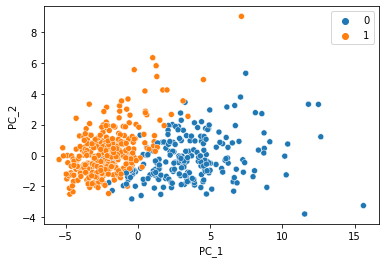

In [74]:
sns.scatterplot(data=None, x=principal_components[:,0], y=principal_components[:,1], hue=y);
plt.xlabel('PC_1');
plt.ylabel('PC_2');

## PCA - Scklearn

### Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(df)

X_scaled.mean(axis=0)
# a (almost) zero vector

array([-1.37363271e-16,  6.86816353e-17, -1.24875700e-16, -2.18532476e-16,
       -8.36667193e-16,  1.87313551e-16,  4.99502802e-17, -4.99502802e-17,
        1.74825981e-16,  4.74527662e-16,  2.37263831e-16, -1.12388130e-16,
       -1.12388130e-16, -1.31119486e-16, -1.52972733e-16,  1.74825981e-16,
        1.62338411e-16,  0.00000000e+00,  8.74129903e-17, -6.24378502e-18,
       -8.24179623e-16,  1.24875700e-17, -3.74627101e-16,  0.00000000e+00,
       -2.37263831e-16, -3.37164391e-16,  7.49254203e-17,  2.24776261e-16,
        2.62238971e-16, -5.74428222e-16])

PCA

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

### Getting the targets

In [79]:
from sklearn.datasets import load_breast_cancer

cancer_dict = load_breast_cancer()
y = cancer_dict.target

### Scatterplot with 2 PCs and labels

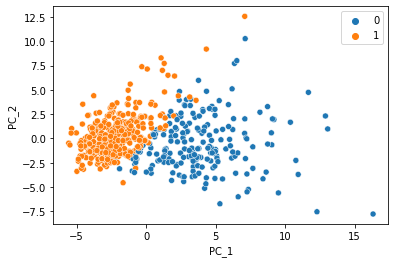

In [80]:
sns.scatterplot(data=None, x=principal_components[:,0], y=principal_components[:,1], hue=y);
plt.xlabel('PC_1');
plt.ylabel('PC_2');

### Principal Components (chosen eigenvectors)

In [82]:
df_comp = pd.DataFrame(pca.components_, index=['PC_1', 'PC_2'], columns=df.columns)
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC_1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC_2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


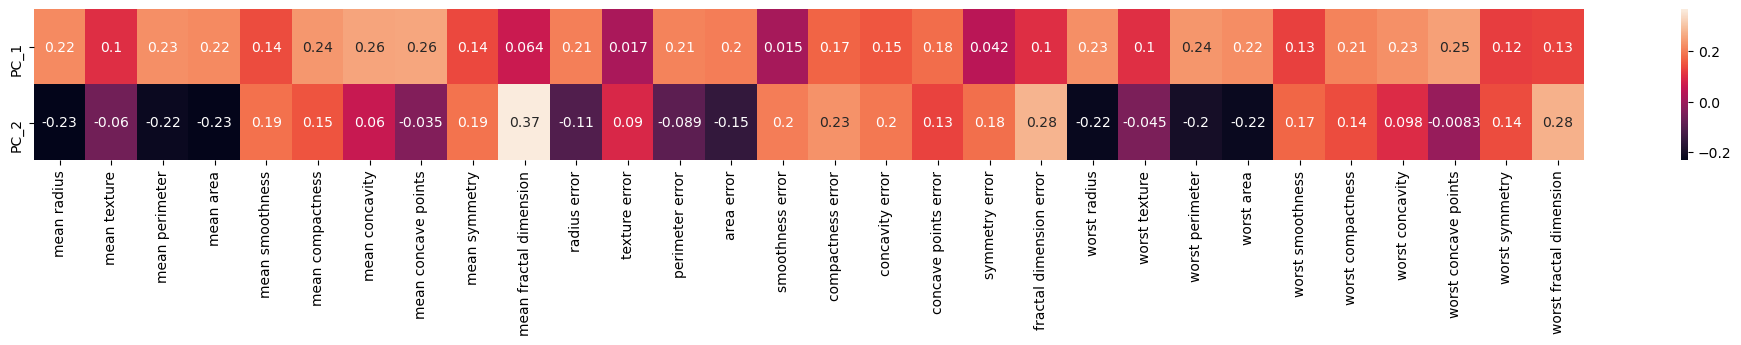

In [88]:
plt.figure(figsize=(25,2), dpi=100)
sns.heatmap(df_comp, annot=True);

In [89]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

- This means that PC1 and PC2 explains around 44% and 19% variance in the data!

### Food for thought !!

In [97]:
explained_varinace = []

for n in range(1,31):
    pca_new = PCA(n_components=n)
    pca_new.fit(X_scaled)
    explained_varinace.append(np.sum(pca_new.explained_variance_ratio_))

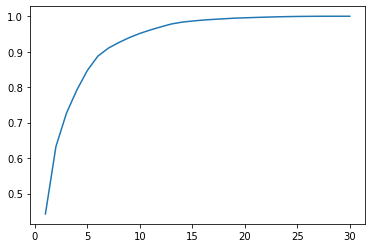

In [98]:
plt.plot(range(1,31), explained_varinace);

- As expected 30 PCs for 30 features explains 100% variance
- Notice even with 1 PC we get ~ 40% variance 